<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework1/hw1_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfTrain = np.loadtxt("ZipDigits.train",delimiter=" ",usecols=range(0, 257))

dfTest = np.loadtxt("ZipDigits.test",delimiter=" ",usecols=range(0, 257))

print("df train :",dfTrain.shape)
print("df test :", dfTest.shape)

filtered_dfTrain = []
filtered_dfTest = []

filtered_dfTrain = dfTrain[(dfTrain[:, 0] == 1) | (dfTrain[:, 0] == 5)]
filtered_dfTest = dfTest[(dfTest[:, 0] == 1) | (dfTest[:, 0] == 5)]

filtered_dfTrain[:, 0] = np.where(filtered_dfTrain[:, 0] == 1, 1, -1)
filtered_dfTest[:, 0] = np.where(filtered_dfTest[:, 0] == 1, 1, -1)

def intensity(image):
    pixels = image[1:]
    #print(pixels.shape)
    return np.mean(pixels)

def hor_symmetry(image):
    # 16 x 16 = 256
    image_2d = image[1:].reshape(16, 16)
    upper_half = image_2d[:8,:]
    lower_half = image_2d[8:,:]
    lower_half_flipped = np.flipud(lower_half)
    return np.mean(np.abs(upper_half - lower_half_flipped))

intensities = np.array([intensity(img) for img in filtered_dfTrain])
symmetries = np.array([hor_symmetry(img) for img in filtered_dfTrain])
labels = filtered_dfTrain[:, 0]

# print(labels.shape)
# print(intensities.shape)
# print(symmetries.shape)

intensities_test = np.array([intensity(img) for img in filtered_dfTest])
symmetries_test = np.array([hor_symmetry(img) for img in filtered_dfTest])
labels_test = filtered_dfTest[:, 0]

# print(labels_test.shape)
# print(intensities_test.shape)
# print(symmetries_test.shape)

#print(labels)

df train : (7291, 257)
df test : (2007, 257)


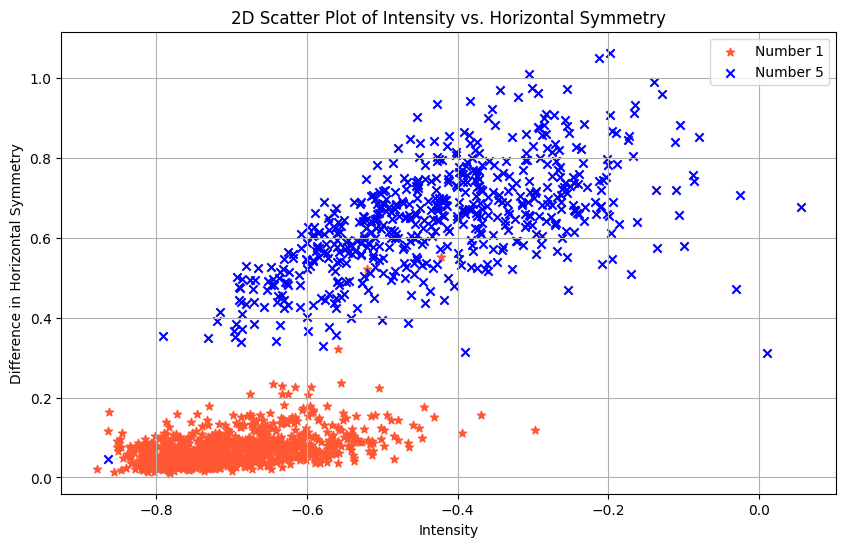

In [74]:
# Training data
plt.figure(figsize=(10, 6))
plt.scatter(intensities[labels==1], symmetries[labels==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities[labels==-1], symmetries[labels==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()

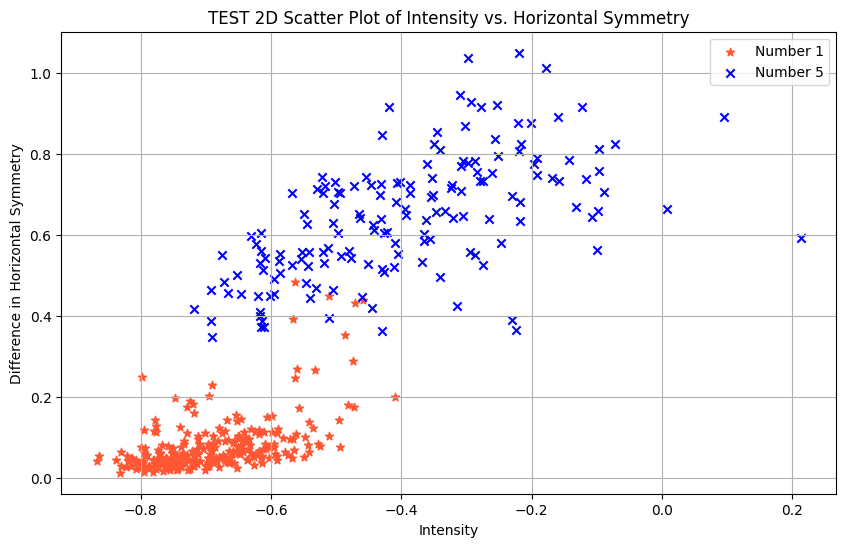

In [73]:
# Test data
plt.figure(figsize=(10, 6))
plt.scatter(intensities_test[labels_test==1], symmetries_test[labels_test==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities_test[labels_test==-1], symmetries_test[labels_test==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("TEST 2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()